In [1]:
%pip -q install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd

# Define the folder containing the jsonl files
folder_path = './metrics'

# List all files in the directory
files = [f for f in os.listdir(folder_path) if f.endswith('.jsonl')]

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through the list of files and read each jsonl file
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_json(file_path, lines=True)
    data_frames.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df.head()


,key,value,_time,_id,_implementation
0,test_insert_duration_ms_100000,14473.0,2024-06-14 18:53:20.843686342,5b2e5808-2f70-4f58-ad14-6d3215c1c222,example
1,test_insert_100000,0.0,2024-06-14 18:53:20.843695879,5b2e5808-2f70-4f58-ad14-6d3215c1c222,example
2,test_insert_duration_ms_10,11.0,2024-06-14 18:53:20.928077459,5b2e5808-2f70-4f58-ad14-6d3215c1c222,example
3,test_insert_10,0.0,2024-06-14 18:53:20.928081036,5b2e5808-2f70-4f58-ad14-6d3215c1c222,example
4,test_insert_duration_ms_10,9.0,2024-06-14 18:53:20.962206125,5b2e5808-2f70-4f58-ad14-6d3215c1c222,example


In [3]:
mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].sum())

value
_id                                  _implementation key                                     
5b2e5808-2f70-4f58-ad14-6d3215c1c222 example         test_insert_duration_ms_10      132573.0
                                                     test_insert_duration_ms_100      34046.0
                                                     test_insert_duration_ms_1000     16522.0
                                                     test_insert_duration_ms_10000    15394.0
                                                     test_insert_duration_ms_100000   14473.0
a264aac4-39a8-4824-8cd5-a8c925ade8c8 example2        test_insert_duration_ms_10      125294.0
                                                     test_insert_duration_ms_100      34419.0
                                                     test_insert_duration_ms_1000     50015.0
                                                     test_insert_duration_ms_10000    42708.0
                                                     test_insert_duration_ms_100000   12174.0

In [4]:
mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].mean())

value
_id                                  _implementation key                                       
5b2e5808-2f70-4f58-ad14-6d3215c1c222 example         test_insert_duration_ms_10         13.2573
                                                     test_insert_duration_ms_100        34.0460
                                                     test_insert_duration_ms_1000      165.2200
                                                     test_insert_duration_ms_10000    1539.4000
                                                     test_insert_duration_ms_100000  14473.0000
a264aac4-39a8-4824-8cd5-a8c925ade8c8 example2        test_insert_duration_ms_10         12.5294
                                                     test_insert_duration_ms_100        34.4190
                                                     test_insert_duration_ms_1000      500.1500
                                                     test_insert_duration_ms_10000    4270.8000
                                                     test_insert_duration_ms_100000  12174.0000

Note: you may need to restart the kernel to use updated packages.
min 0 0.38823529411764707
max 45965 5.0194117647058825
avg 5292.039611


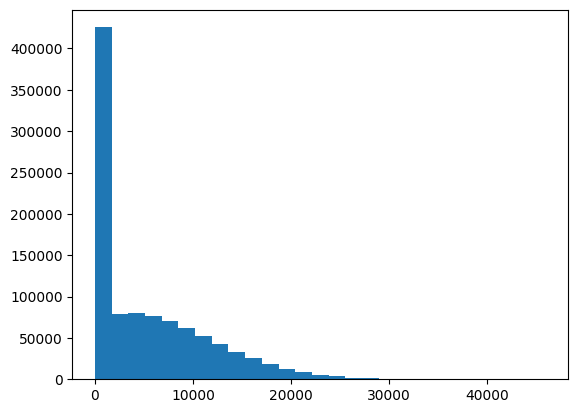

In [8]:
%pip install -q matplotlib

import random  
import matplotlib.pyplot as plt  

def yield_gauss(mu, sigma, min_value, max_value):
    while True:
        num = int(round(random.gauss(mu, sigma),0))
        # yield min value if lower
        # keep trying until num is between min & max value
        if num <= min_value:
            yield min_value
        elif min_value <= num <= max_value:
            yield num

# Parameters
mu = 3300
sigma = 8500
min_value = 0 # 700
max_value = 200000 # 1300

# Generate numbers using the yieldable function
nums = []
gauss_gen = yield_gauss(mu, sigma, min_value, max_value)
for _ in range(1_000_000):
    nums.append(int(next(gauss_gen)))

print("min", min(nums), abs(mu - min(nums)) / sigma)
print("max", max(nums), abs(mu - max(nums)) / sigma)
print("avg", sum(nums) / len(nums))
# Plotting a graph
plt.hist(nums, bins=27)
plt.show()

In [4]:
8000000/3000000


2.6666666666666665